In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cftime
import cartopy
import cartopy.crs as ccrs
from scipy.io import loadmat

import string
alphabet=list(string.ascii_lowercase)

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

# Read in Data

In [2]:
ctrl={}
case={}

ctrl['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
ctrl['machine_target']='gfdl.ncrc4-intel19-prod'
ctrl['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'

case['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
case['machine_target']='gfdl.ncrc4-intel19-prod'
#case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
case['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'
# case['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'


In [3]:
if 'hp' in case['name']:
    hp_det_is_fast=True
else:
    hp_det_is_fast=False

In [4]:
short_casename=case['name'].replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-060822":
    fig_casename='gzCOBALT-tun_cy1'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-tun_hp_cy5 gzCOBALT-tun_hp_cy5


In [5]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [6]:
tmpdir = '/work/Jessica.Luo/tmp/'+case['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5


In [7]:
# read in files
diagTypes = ['ocean_cobalt_btm'] 

pp_dates='1988-2007'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension

int_file = tmpdir + '/'+ 'ocean_cobalt_omip_2d' + '.ann.' + pp_dates + '.nc'

print(files, int_file)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/ocean_cobalt_btm.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5/

In [8]:
ds=xr.open_dataset(files[0])
ds_2d = xr.open_dataset(int_file)

grid_file=os.path.join(case['path_root'], case['name'], case['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
grid=xr.open_dataset(grid_file)

In [9]:
tmpdir = '/work/Jessica.Luo/tmp/'+ctrl['name']
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_btm','ocean_cobalt_omip_rates_year_z'] 

pp_dates='1988-2007'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]
c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

c_int_file = tmpdir + '/'+ 'ocean_cobalt_omip_2d' + '.ann.' + pp_dates + '.nc'

print(c_int_file, c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5
/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_omip_2d.ann.1988-2007.nc ['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_cobalt_btm.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_cy5/ocean_

In [10]:
dc=xr.open_dataset(c_files[0])
dc_2d = xr.open_dataset(c_int_file)

# Calculate export and transfer efficiency to the bottom

In [11]:
ds = ds.isel(time=0)
dc = dc.isel(time=0)

In [12]:
flux100 = ds_2d.epc100.isel(time=0)
c_flux100 = dc_2d.epc100.isel(time=0)

te_btm = ((ds.fndet_btm + ds.fndet_fast_btm) * cobalt_n_2_c)/flux100
c_te_btm = ((dc.fndet_btm) * cobalt_n_2_c)/c_flux100

In [13]:
val=((ds.fndet_btm + ds.fndet_fast_btm)*grid.areacello).sum().values*cobalt_n_2_c*carbon_molar_mass*seconds_per_year
print('Flux to bottom (fastPOC): '+ str(np.round(val/1e15,2)) + ' Pg C/yr')

c_val=(dc.fndet_btm*grid.areacello).sum().values*cobalt_n_2_c*carbon_molar_mass*seconds_per_year
print('Flux to bottom (Ctrl): '+ str(np.round(c_val/1e15,2)) + ' Pg C/yr')

pct_diff = (val-c_val)/c_val
print('Percent difference: '+ str(np.round(pct_diff*100,2)) + ' %')

factor_diff = val/c_val
print('Factor difference: '+ str(np.round(factor_diff,2)))

Flux to bottom (fastPOC): 1.35 Pg C/yr
Flux to bottom (Ctrl): 1.13 Pg C/yr
Percent difference: 19.95 %
Factor difference: 1.2


In [14]:
print(ds.fndet_btm.attrs['long_name'])
print(ds.fndet_btm.attrs['units'])

ndet sinking flux to bottom
mol m-2 s-1


In [15]:
fastgz=(ds.fndet_fast_btm + ds.fndet_btm) * seconds_per_day * cobalt_n_2_c * carbon_molar_mass * 1e3
ctrlgz=dc.fndet_btm * seconds_per_day * cobalt_n_2_c * carbon_molar_mass * 1e3

# Plot

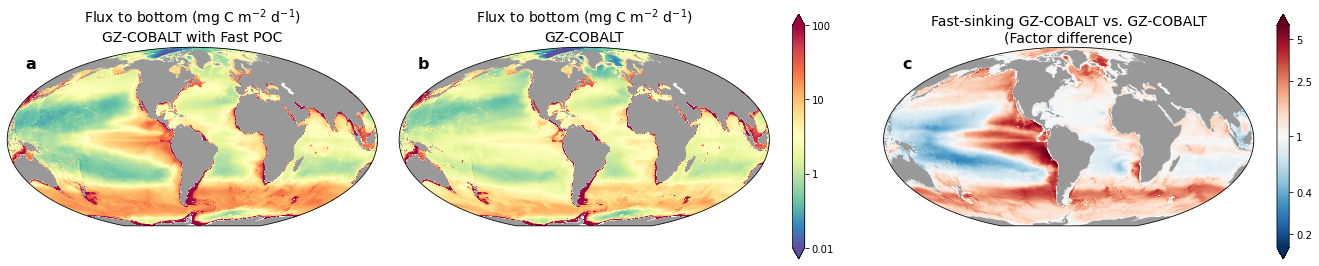

In [16]:
fig=plt.figure(figsize=(24,6))
gs=gridspec.GridSpec(1,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}

cmin=-1; cmax=2
ticks=[-1, 0, 1, 2]
labels=[0.01, 1, 10, 100]

fastgz=np.log10((ds.fndet_fast_btm + ds.fndet_btm) * seconds_per_day * cobalt_n_2_c * carbon_molar_mass * 1e3)
ctrlgz=np.log10(dc.fndet_btm * seconds_per_day * cobalt_n_2_c * carbon_molar_mass * 1e3)

####
i=0
field=fastgz
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=cmax, vmin=cmin, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Flux to bottom (mg C m$^{-2}$ d$^{-1}$)\nGZ-COBALT with Fast POC', fontsize=14)

ax[i].text(0.05, 0.95, 'a', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
field=ctrlgz
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=cmax, vmin=cmin, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Flux to bottom (mg C m$^{-2}$ d$^{-1}$)\nGZ-COBALT', fontsize=14)
ax[i].text(0.05, 0.95, 'b', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

####
i=2
field=fastgz-ctrlgz # keep in mind that the difference between logs is the log of the division!

cmin=-0.8; cmax=0.8
ticks=[-0.7, -0.4, 0, 0.4, 0.7]
labels=[0.2, 0.4, 1, 2.5, 5]


ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=cmax, vmin=cmin, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Fast-sinking GZ-COBALT vs. GZ-COBALT\n(Factor difference)', fontsize=14)
ax[i].text(0.05, 0.95, 'c', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_BottomFlux_Comparison.png', dpi=300, bbox_inches='tight')


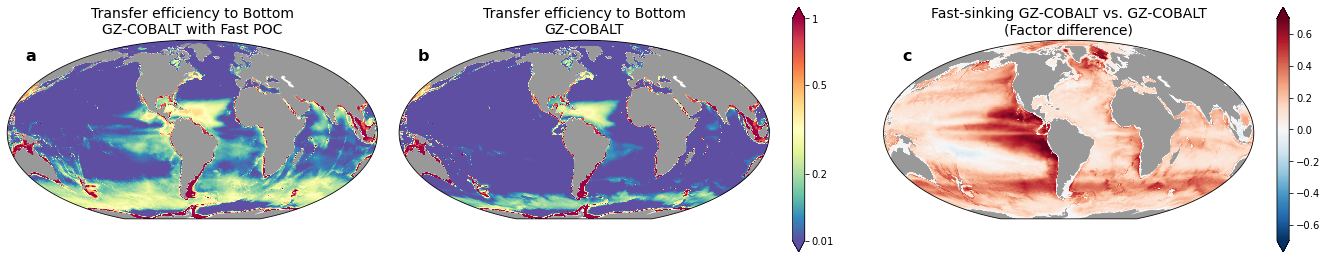

In [17]:
fig=plt.figure(figsize=(24,6))
gs=gridspec.GridSpec(1,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}

cmin=-1; cmax=0
ticks=[-1, -0.7, -0.3, 0]
labels=[0.01, 0.2, 0.5, 1]

fastgz=np.log10(te_btm)
ctrlgz=np.log10(c_te_btm)

i=0
field=fastgz
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=cmax, vmin=cmin, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Transfer efficiency to Bottom\nGZ-COBALT with Fast POC', fontsize=14)

ax[i].text(0.05, 0.95, 'a', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

i=1
field=ctrlgz
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=cmax, vmin=cmin, cmap='Spectral_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Transfer efficiency to Bottom\nGZ-COBALT', fontsize=14)
ax[i].text(0.05, 0.95, 'b', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

cbar=plt.colorbar(cs[i], shrink=0.75, ticks=ticks, extend='both')
cbar.ax.set_yticklabels(labels)

i=2
field=fastgz-ctrlgz # keep in mind that the difference between logs is the log of the division!

cmin=-0.7; cmax=0.7
ticks=[-0.7, -0.4, 0, 0.4, 0.7]
labels=[0.2, 0.4, 1, 2.5, 5]

ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=cmax, vmin=cmin, cmap='RdBu_r')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Fast-sinking GZ-COBALT vs. GZ-COBALT\n(Factor difference)', fontsize=14)
ax[i].text(0.05, 0.95, 'c', transform=ax[i].transAxes, fontsize=16, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_Teff_Btm_Comparison.png', dpi=300, bbox_inches='tight')
